### Heres description of competition dataset. You can also refer it on kaggle. I have attached the link at the end of this notebook.

In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

File and Data Field Descriptions
train.csv - Personal records for about two-thirds (8700) of the passengers, to be used as training data.  
PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.  
HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.  
CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.  
Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
Destination - The planet the passenger will be debarking to.  
Age - The age of the passenger.  
VIP - Whether the passenger has paid for special VIP service during the voyage.  
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.  
Name - The first and last names of the passenger.  
Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.  
test.csv - Personal records for the remaining one-third (4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
data = pd.read_csv("train.csv")
data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [4]:
data.shape

(8693, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
# Split the 'cabin' column into three new columns deck, num and side would be more beneficial in predicting
data[['deck', 'num', 'side']] = data['Cabin'].str.split('/', expand=True)
# Drop the original 'cabin' column as it is no longer needed
data = data.drop(columns=['Cabin'])

In [9]:
# Summing the additional charges spent into a single column
data['total_amt_spent_on_luxury_amenities'] = data[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)
# Drop the original columns
data = data.drop(columns=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'])

In [10]:
data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,deck,num,side,total_amt_spent_on_luxury_amenities
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,B,0,P,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,Juanna Vines,True,F,0,S,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,Altark Susent,False,A,0,S,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,Solam Susent,False,A,0,S,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,Willy Santantines,True,F,1,S,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,Gravior Noxnuther,False,A,98,P,8536.0
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,Kurta Mondalley,False,G,1499,S,0.0
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,Fayey Connon,True,G,1500,S,1873.0
8691,9280_01,Europa,False,55 Cancri e,32.0,False,Celeon Hontichre,False,E,608,S,4637.0


In [11]:
from sklearn.model_selection import train_test_split
x = data.drop(columns="Transported")
y = data.Transported
# first train test split before preprocessing to avoid data leakage
x_train, x_valid, y_train, y_valid = train_test_split(x,y, train_size=0.8, random_state=42)

In [12]:
X_train_plus = x_train.copy()
X_valid_plus = x_valid.copy()

## Lets impute the missing columns

In [13]:
cols1 = ["deck","num","side"]
X_train_plus[cols1] = X_train_plus[cols1].fillna(method="bfill")
X_valid_plus[cols1] = X_valid_plus[cols1].fillna(method="ffill")

In [14]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy="most_frequent")
cols2 = ["HomePlanet","CryoSleep","Destination","VIP"]
X_train_plus[cols2] = my_imputer.fit_transform(X_train_plus[cols2])
X_valid_plus[cols2] = my_imputer.transform(X_valid_plus[cols2])

In [15]:
cols3 = ["Age","total_amt_spent_on_luxury_amenities"]
my_imputer2 = SimpleImputer(strategy = "median")
X_train_plus[cols3] = my_imputer2.fit_transform(X_train_plus[cols3])
X_valid_plus[cols3] = my_imputer2.transform(X_valid_plus[cols3])

In [16]:
X_train_plus.isnull().sum()

PassengerId                              0
HomePlanet                               0
CryoSleep                                0
Destination                              0
Age                                      0
VIP                                      0
Name                                   159
deck                                     0
num                                      0
side                                     0
total_amt_spent_on_luxury_amenities      0
dtype: int64

In [17]:
X_valid_plus.isnull().sum()

PassengerId                             0
HomePlanet                              0
CryoSleep                               0
Destination                             0
Age                                     0
VIP                                     0
Name                                   41
deck                                    0
num                                     0
side                                    0
total_amt_spent_on_luxury_amenities     0
dtype: int64

### Lets drop name as its not of that use in predicting whether the passenger is transported to other dimension or not

In [18]:
X_valid_plus.drop(columns=["Name"],inplace=True)
X_train_plus.drop(columns=["Name"],inplace=True)

### now our data doesnt have any missing 

In [19]:
X_train_plus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6954 entries, 2333 to 7270
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   PassengerId                          6954 non-null   object 
 1   HomePlanet                           6954 non-null   object 
 2   CryoSleep                            6954 non-null   object 
 3   Destination                          6954 non-null   object 
 4   Age                                  6954 non-null   float64
 5   VIP                                  6954 non-null   object 
 6   deck                                 6954 non-null   object 
 7   num                                  6954 non-null   object 
 8   side                                 6954 non-null   object 
 9   total_amt_spent_on_luxury_amenities  6954 non-null   float64
dtypes: float64(2), object(8)
memory usage: 597.6+ KB


PassengerId is of the form gggg_pp where gggg respesent the group no ie 2 passengers with same gggg are of the same group and pp is id within group, So its logically sound to take break the gggg and pp separately.  

In [20]:
# Split the 'PassengerId' column into two new columns
X_train_plus[['passenger_grp', 'id']] = X_train_plus['PassengerId'].str.split('_', expand=True)
X_valid_plus[['passenger_grp', 'id']] = X_valid_plus['PassengerId'].str.split('_', expand=True)

# Drop the original 'PassengerId' column as it's no longer needed
X_train_plus = X_train_plus.drop(columns=['PassengerId'])
X_valid_plus = X_valid_plus.drop(columns=['PassengerId'])

ID within grp doesnt make much sense for association with out target so lets drop it

In [21]:
X_valid_plus.drop(columns=["id"],inplace=True)
X_train_plus.drop(columns=["id"],inplace=True)

## Now lets encode the categorical data

In [22]:
X_train_plus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6954 entries, 2333 to 7270
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   HomePlanet                           6954 non-null   object 
 1   CryoSleep                            6954 non-null   object 
 2   Destination                          6954 non-null   object 
 3   Age                                  6954 non-null   float64
 4   VIP                                  6954 non-null   object 
 5   deck                                 6954 non-null   object 
 6   num                                  6954 non-null   object 
 7   side                                 6954 non-null   object 
 8   total_amt_spent_on_luxury_amenities  6954 non-null   float64
 9   passenger_grp                        6954 non-null   object 
dtypes: float64(2), object(8)
memory usage: 597.6+ KB


In [23]:
X_train_plus["passenger_grp"] = pd.to_numeric(X_train_plus["passenger_grp"])
X_valid_plus["passenger_grp"] = pd.to_numeric(X_valid_plus["passenger_grp"])
X_train_plus["num"] = pd.to_numeric(X_train_plus["num"])
X_valid_plus["num"] = pd.to_numeric(X_valid_plus["num"])

In [24]:
X_train_plus.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6954 entries, 2333 to 7270
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   HomePlanet                           6954 non-null   object 
 1   CryoSleep                            6954 non-null   object 
 2   Destination                          6954 non-null   object 
 3   Age                                  6954 non-null   float64
 4   VIP                                  6954 non-null   object 
 5   deck                                 6954 non-null   object 
 6   num                                  6954 non-null   int64  
 7   side                                 6954 non-null   object 
 8   total_amt_spent_on_luxury_amenities  6954 non-null   float64
 9   passenger_grp                        6954 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 597.6+ KB


In [25]:
# One hot encoding low cardiality columns
ohe_cols=["HomePlanet","CryoSleep","Destination","VIP"]
X_train_final = pd.get_dummies(X_train_plus, columns=ohe_cols, drop_first=True)
X_valid_final = pd.get_dummies(X_valid_plus, columns=ohe_cols, drop_first=True)

In [26]:
X_train_final

,Age,deck,num,side,total_amt_spent_on_luxury_amenities,passenger_grp,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
2333,28.0,F,575,P,711.0,2513,False,False,False,False,True,False
2589,17.0,F,575,P,1226.0,2774,False,False,False,False,True,False
8302,28.0,C,329,S,0.0,8862,True,False,True,False,False,False
8177,20.0,F,1800,P,1267.0,8736,False,True,False,False,True,False
500,36.0,C,18,P,0.0,539,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,18.0,G,988,S,770.0,6076,False,False,False,False,True,False
5191,50.0,F,1063,S,1910.0,5537,False,True,False,False,True,False
5390,22.0,F,1194,P,660.0,5756,False,False,False,True,False,False
860,34.0,F,191,P,2005.0,925,False,True,False,False,True,False


In [27]:
from sklearn.preprocessing import LabelEncoder
# Label encoding 2 cols deck and side with comparitively more cardiality as one-hot would create many cols
label_encoder = LabelEncoder()
X_train_final['deck'] = label_encoder.fit_transform(X_train_final['deck'])
X_valid_final['deck'] = label_encoder.transform(X_valid_final['deck'])
X_train_final['side'] = label_encoder.fit_transform(X_train_final['side'])
X_valid_final['side'] = label_encoder.fit_transform(X_valid_final['side'])

In [28]:
X_valid_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1739 entries, 304 to 6093
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  1739 non-null   float64
 1   deck                                 1739 non-null   int32  
 2   num                                  1739 non-null   int64  
 3   side                                 1739 non-null   int32  
 4   total_amt_spent_on_luxury_amenities  1739 non-null   float64
 5   passenger_grp                        1739 non-null   int64  
 6   HomePlanet_Europa                    1739 non-null   bool   
 7   HomePlanet_Mars                      1739 non-null   bool   
 8   CryoSleep_True                       1739 non-null   bool   
 9   Destination_PSO J318.5-22            1739 non-null   bool   
 10  Destination_TRAPPIST-1e              1739 non-null   bool   
 11  VIP_True                         

In [29]:
X_valid_final.isnull().sum()

Age                                    0
deck                                   0
num                                    0
side                                   0
total_amt_spent_on_luxury_amenities    0
passenger_grp                          0
HomePlanet_Europa                      0
HomePlanet_Mars                        0
CryoSleep_True                         0
Destination_PSO J318.5-22              0
Destination_TRAPPIST-1e                0
VIP_True                               0
dtype: int64

In [30]:
X_train_final.isnull().sum()

Age                                    0
deck                                   0
num                                    0
side                                   0
total_amt_spent_on_luxury_amenities    0
passenger_grp                          0
HomePlanet_Europa                      0
HomePlanet_Mars                        0
CryoSleep_True                         0
Destination_PSO J318.5-22              0
Destination_TRAPPIST-1e                0
VIP_True                               0
dtype: int64

### now all columns are numerical and there arent any missing values, so we are ready to train the model

<Axes: ylabel='None'>

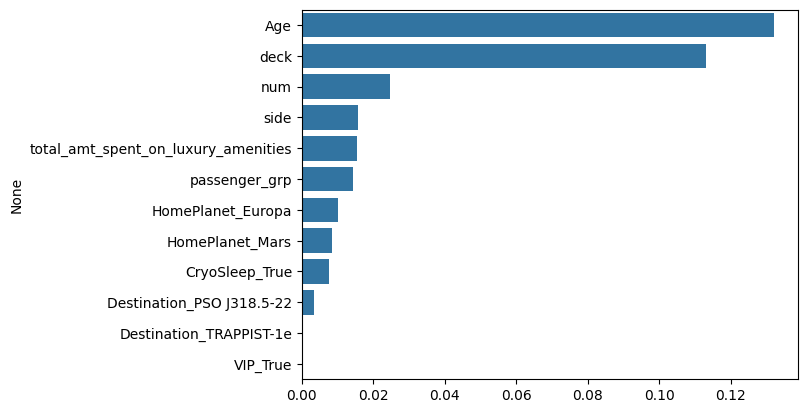

In [31]:
# Lets plot mutual info scores from which we can do feature selection
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_train_final,y_train,random_state=42)
mi = np.sort(mi)[::-1]
sns.barplot(y=X_train_final.columns, x=mi)

# Lets train SVM

In [35]:
from sklearn.svm import SVC

# define the model, then train it using training set and make predictions on validation set
svm_model = SVC(random_state=42)
svm_model.fit(X_train_final, y_train)
svm_predictions = svm_model.predict(X_valid_final)

# Calculate accuracy, classification report and confusion-matrix
accu = accuracy_score(y_valid, svm_predictions)
print("SVM Model Accuracy:", accu)
print("Classification Report for SVM:")
print(classification_report(y_valid, svm_predictions))
conf_matrix = confusion_matrix(y_valid, svm_predictions)
print("Confusion Matrix:")
print(conf_matrix)

SVM Model Accuracy: 0.7331799884991375
Classification Report for SVM:
              precision    recall  f1-score   support

       False       0.71      0.79      0.75       861
        True       0.77      0.68      0.72       878

    accuracy                           0.73      1739
   macro avg       0.74      0.73      0.73      1739
weighted avg       0.74      0.73      0.73      1739

Confusion Matrix:
[[678 183]
 [281 597]]


# Lets train Gradientboost and tune its hyperparameters using randomsearchcv

In [33]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Define parameter distribution
param_dist = {
    'n_estimators': randint(200,300, 400),
    'learning_rate': uniform(0.01, 0.1),
    'max_depth': randint(3, 6),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4),
    'subsample': uniform(0.7, 0.3),
}

# Initialize the model
gradientboost_model = GradientBoostingClassifier(random_state=42)
# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gradientboost_model, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, scoring='accuracy', random_state=42)

# Fit the model
random_search.fit(X_train_final, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_
print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

# Evaluate the best model on the validation set
best_model = random_search.best_estimator_
gradientboost_predictions1 = best_model.predict(X_valid_final)
accu8 = accuracy_score(y_valid, gradientboost_predictions1)
print("Gradient Boosting after hyperparameter tuning:")
print(accu8)

Best Parameters: {'learning_rate': 0.010506158384621869, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 653, 'subsample': 0.8345272428958741}
Best Cross-Validation Accuracy: 0.7581276344847918
Gradient Boosting after hyperparameter tuning:
0.7590569292696953


In [34]:
from sklearn.metrics import classification_report, confusion_matrix

# Print the classification report
print("Classification Report for Gradient Boosting after hyperparameter tuning:")
print(classification_report(y_valid, gradientboost_predictions1))

# Compute and print the confusion matrix
conf_matrix = confusion_matrix(y_valid, gradientboost_predictions1)
print("Confusion Matrix:")
print(conf_matrix)

Classification Report for Gradient Boosting after hyperparameter tuning:
              precision    recall  f1-score   support

       False       0.73      0.81      0.77       861
        True       0.79      0.71      0.75       878

    accuracy                           0.76      1739
   macro avg       0.76      0.76      0.76      1739
weighted avg       0.76      0.76      0.76      1739

Confusion Matrix:
[[697 164]
 [255 623]]


I did this few months ago, due to lack of time for preparing for other subject i just modified it a little and submiting it.  
Here is the kaggle link for the [Kaggle Summer School Hackathon](https://www.kaggle.com/competitions/summer-school-24-25-hackathon)  
I secured 5th rank in that hackathon conducted by IIT Madras AI club under there summer school.